# **Tratamento de Dados das Ações**

- Diogo Nunes Batista
- Rafael de Oliveira Évora
- Vinicius Gabriel 

### Carregamento dos dados

In [22]:
import pandas
import numpy as np

df_stocks_types = {
    'ABERTURA': np.float64,
    'FECHAMENTO': np.float64,
    'VARIAÇÃO': np.float64,
    'MÍNIMO': np.float64,
    'MÁXIMO': np.float64,
    'VOLUME': str
}

df_selic_types = {
    'valor': np.float64,
}

STOCK_NAME = 'COGN3'

df_stocks = pandas.read_csv(f'data/raw/{STOCK_NAME}.csv', index_col="DATA" , dtype=df_stocks_types, decimal=',')

df_selic = pandas.read_csv('data/raw/selic.csv', sep=';', index_col="data",  dtype=df_selic_types , decimal=',')

df_stocks, df_selic

(            ABERTURA  FECHAMENTO  VARIAÇÃO  MÍNIMO  MÁXIMO   VOLUME
 DATA                                                               
 14/11/2024      1.40        1.35     -4.26    1.35    1.43  105,41M
 13/11/2024      1.47        1.41      0.71    1.36    1.42   95,29M
 12/11/2024      1.36        1.40     -5.41    1.40    1.49  105,82M
 11/11/2024      1.36        1.48      8.82    1.35    1.49   60,08M
 08/11/2024      1.53        1.36     -4.23    1.34    1.50  208,62M
 ...              ...         ...       ...     ...     ...      ...
 08/01/2024      3.31        3.37      0.90    3.30    3.42   52,68M
 05/01/2024      3.26        3.34      2.77    3.21    3.40   80,45M
 04/01/2024      3.36        3.25     -3.56    3.22    3.36   88,91M
 03/01/2024      3.35        3.37      0.30    3.29    3.39   63,97M
 02/01/2024      3.48        3.36     -3.72    3.36    3.48   82,02M
 
 [222 rows x 6 columns],
                valor
 data                
 03/01/2022  0.034749
 04/01/202

### Tratamento dos dados

In [23]:
df_selic.rename(columns={'valor': 'SELIC'}, inplace=True)
df_selic['SELIC'] = df_selic['SELIC']

df_stocks['VOLUME'] = df_stocks['VOLUME'].str.replace('M', '').str.replace(',', '.').astype(np.float64) # Remove 'M' e subtitui ',' por '.' o que possibilita a conversão para float

df = df_stocks.join(df_selic, how='inner') # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

df = df.iloc[::-1]

df

,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME,SELIC
02/01/2024,3.48,3.36,-3.72,3.36,3.48,82.02,0.043739
03/01/2024,3.35,3.37,0.30,3.29,3.39,63.97,0.043739
04/01/2024,3.36,3.25,-3.56,3.22,3.36,88.91,0.043739
05/01/2024,3.26,3.34,2.77,3.21,3.40,80.45,0.043739
08/01/2024,3.31,3.37,0.90,3.30,3.42,52.68,0.043739
...,...,...,...,...,...,...,...
08/11/2024,1.53,1.36,-4.23,1.34,1.50,208.62,0.041957
11/11/2024,1.36,1.48,8.82,1.35,1.49,60.08,0.041957
12/11/2024,1.36,1.40,-5.41,1.40,1.49,105.82,0.041957
13/11/2024,1.47,1.41,0.71,1.36,1.42,95.29,0.041957


### Plotando

C:\Users\vinic\AppData\Local\Temp\ipykernel_17396\2736737018.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.get_figure().show()


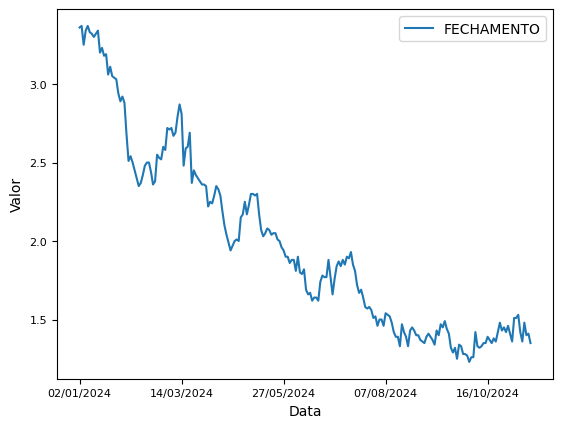

In [24]:
ax = df.plot(y='FECHAMENTO', xlabel='Data', ylabel='Valor', fontsize=8)
ax.get_figure().show()

### Normalização

In [25]:
df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']] = df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']].div(100.0)
df['VOLUME'] = df['VOLUME'].div(1000.0)
df['VARIAÇÃO'] = df['VARIAÇÃO'].add(100.0).div(1000.0)

df.to_csv(f'data/final/{STOCK_NAME}.csv', index_label='DATA', sep=';', decimal='.')